In [1]:
from keras import layers
from keras import models


In [3]:
model=models.Sequential()

In [2]:
import shutil, os

In [9]:
original_dir='dogs-vs-cats\dataset'
base_dir='dogs-vs-cats\data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir) 

validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

In [5]:
os.mkdir('Desktop')

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(train_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(validation_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(test_cats_dir, fname)    
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(train_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(test_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:    
    src = os.path.join(original_dir, fname)    
    dst = os.path.join(validation_dogs_dir, fname)    
    shutil.copyfile(src, dst)

In [24]:
print('total training cat images:', len(os.listdir(train_dogs_dir)))

total training cat images: 1000


Model LAyers

In [2]:
from keras import layers 
from keras import models
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

Model Compilation

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir='data/train'

In [21]:
validation_dir='data/validation'

In [15]:
train_generator = train_datagen.flow_from_directory( train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
print(train_generator)

In [23]:
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [22]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 150s 1s/step - loss: 0.6922 - acc: 0.5255 - val_loss: 0.6769 - val_acc: 0.6290
Epoch 2/30
100/100 [==============================] - 174s 2s/step - loss: 0.6648 - acc: 0.6065 - val_loss: 0.6530 - val_acc: 0.6130
Epoch 3/30
100/100 [==============================] - 142s 1s/step - loss: 0.6239 - acc: 0.6400 - val_loss: 0.6180 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 165s 2s/step - loss: 0.5685 - acc: 0.7125 - val_loss: 0.6413 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 157s 2s/step - loss: 0.5350 - acc: 0.7315 - val_loss: 0.7337 - val_acc: 0.6040
Epoch 6/30
100/100 [==============================] - 158s 2s/step - loss: 0.5096 - acc: 0.7535 - val_loss: 0.5638 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 151s 2s/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.5530 - val_acc: 

In [25]:
model.save('cats_and_dogs_small_2.h5')

In [4]:
def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image=image.convert( "RGB")
    image=image.resize(target_size)
    image=img_to_array(image)
    image=np.expand_dims(image,axis=0)
    return image

In [3]:
model=load_model('cats_and_dogs_small_2.h5')

In [2]:
from keras.models import load_model

In [7]:
model

In [6]:
from PIL import Image

In [10]:
image=Image.open('test/dog.449.jpg')

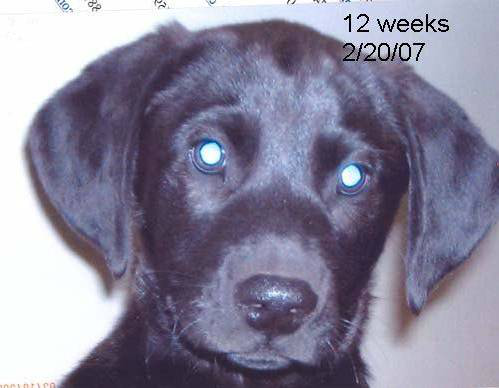

In [11]:
image

In [23]:
preprocessed_image=preprocess_image(image,target_size=(150,150))
prediction=model.predict(preprocessed_image)
print(prediction)
if prediction==1:
    pred['Dog']='Yes'
    pred['Cat']='No'
else:
    pred['Dog']='No'
    pred['Cat']='Yes'

[[1.]]


In [13]:
import numpy as np
from keras.preprocessing.image import img_to_array

In [15]:
pred={'Dog':'','Cat':''}

In [31]:
prediction[0]

array([1.], dtype=float32)

In [27]:
pred

{'Dog': 'Yes', 'Cat': 'No'}

In [29]:
pred['Dog']

'Yes'